样本的性质决定了假设检验所采用的形式，一份完整的数据分析报告应当按照如下所示步骤进行

![数据分析报告](https://pic1.zhimg.com/v2-94ef6f9f8354afdc997cba94015065b8_b.jpg)

A/B测试——独立双样本检验

这是两款键盘布局不一样的手机(A版本，B版本)，你作为公司的产品经理，想在正式发布产品之前知道，
哪个键盘布局对用户体验更好呢？

首先，我们需要设置目标，用来衡量各个版本的优劣，如果是电商网站，目标可以是点击率，注册率，页面停留时间等。

在这个键盘布局案例里，如果一个键盘布局对用户打字时拼错产生的影响较小，那么这个布局是符合用户体验习惯的。
所以我们将目标定为用户打字时拼错字产生的影响。

有了目标以后，下一步就是采集数据。在这一部分，用户会随机分配到不同版本中，通过他们的交互行为会被直接检测，
并收集起来作为以后分析的重要数据。

我们随机抽取实验者，将实验者分成2组，每组25人，A组使用键盘布局A，B组使用键盘布局B。
让他们在30秒内打出标准的20个单词文字消息，然后记录打错字的数量。

我们将数据记录在Excel中，A列是使用键盘布局A打错字的数量，B列是使用键盘布局B打错字的数量。

现在我们开始A/B测试

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fileNameStr='键盘AB测试.xlsx'
xls=pd.ExcelFile(fileNameStr)
data=xls.parse('Sheet1',dtype='object')
data.head()

,A,B
0,6,6
1,6,11
2,2,8
3,7,5
4,8,11


In [3]:
data.describe()

,A,B
count,25,25
unique,8,9
top,4,11
freq,6,4


In [4]:
#转换字符串类型
data['A']=data['A'].astype('int')
data['B']=data['B'].astype('int')
print('转换后的数据类型：\n',data.dtypes)


转换后的数据类型：
 A    int64
B    int64
dtype: object


In [5]:
a_mean=data['A'].mean()
b_mean=data['B'].mean()
print('A版本平均值=',a_mean,'单位：打错字数量')
print('B版本平均值=',b_mean,'单位：打错字数量')
#pandas默认计算的是样本标准差
a_std=data['A'].std()
b_std=data['B'].std()
print('A版本样本大小25，样本标准差=',a_std,'单位：打错字数量')
print('B版本样本大小25，样本标准差=',b_std,'单位：打错字数量')

A版本平均值= 5.08 单位：打错字数量
B版本平均值= 7.8 单位：打错字数量
A版本样本大小25，样本标准差= 2.05993527406405 单位：打错字数量
B版本样本大小25，样本标准差= 2.6457513110645903 单位：打错字数量


推论统计分析

零假设：两个版本没有差别
备选假设：两个版本有差别

/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/pyth

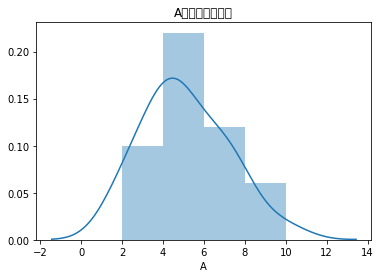

/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38598 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huangliang/opt/anaconda3/lib/pyth

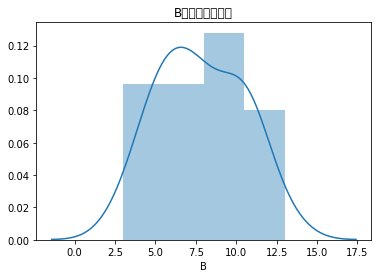

In [6]:
#确定抽样分布类型，小于30，看数据集分布类型
import seaborn as sns
sns.distplot(data['A'])
plt.title('A版本数据集分布')
plt.show()
sns.distplot(data['B'])
plt.title('B版本数据集分布')
plt.show()

In [7]:
#检验方向：不等，使用双尾检验
#Scipy的双独立样本t检验不能返回自由度，对于后面计算置信区间不方便。
#所以我们使用另一个统计包（statsmodels）

import statsmodels.stats.weightstats as st

'''
ttest_ind：独立双样本t检验，
usevar='unequal'两个总体方差不一样
返回的第1个值t是假设检验计算出的（t值），
第2个p_two是双尾检验的p值
第3个df是独立双样本的自由度
'''

"\nttest_ind：独立双样本t检验，\nusevar='unequal'两个总体方差不一样\n返回的第1个值t是假设检验计算出的（t值），\n第2个p_two是双尾检验的p值\n第3个df是独立双样本的自由度\n"

In [8]:
t,p_two,df=st.ttest_ind(data['A'],data['B'],usevar='unequal')
print('t=',t,'p_two=',p_two,'df=',df)

t= -4.055938536857321 p_two= 0.00019457455307216092 df= 45.27813331135627


In [9]:
alpha=0.05

if (p_two<alpha):
    print('拒绝零假设，有统计显著，也就是接受备选假设')
    print('备选假设：A版本和B版本有区别')
else:
    print('接受零假设，没有统计显著')
    print('零假设：A版本和B版本没有区别')

拒绝零假设，有统计显著，也就是接受备选假设
备选假设：A版本和B版本有区别


In [11]:
t_ci=2.0141
a_n=25
b_n=25
#numpy.square 平方,numpy.sqrt开方
se=np.sqrt(np.square(a_std)/a_n+np.square(b_std)/b_n)
sample_mean=a_mean-b_mean
a=sample_mean-t_ci*se
b=sample_mean+t_ci*se
print('两个平均值差值的置信区间，95置信水平CI=[%f,%f]'%(a,b))

两个平均值差值的置信区间，95置信水平CI=[-4.070699,-1.369301]


效应量：差异指标Cohen's d
这里的标准差，因为是双独立样本，需要用合并标准差（pooled standard deviations）代替

In [12]:
sp=np.sqrt(((a_n-1)*np.square(a_std)+(b_n-1)*np.square(b_std))/(a_n+b_n-2))
d=(a_mean-b_mean)/sp
print('d=',d)

d= -1.1471926574

d= -1.1471926573950622


数据分析报告：
1、描述统计分析
A版本打错字数量平均是5.08个，标准差是2.06个
B版本打错字数量平均是7.8个，标准差是2.65个
2、推论统计分析
1）假设检验
独立双样本t(45)=-4.05,p=0.00019(α=5%)，双尾检验
拒绝零假设，统计显著
2）置信区间
两个平均值差值的置信区间，95%置信水平CI=[-4.07,-1.37]
3)效应量d=-1.15,效果显著